In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance
import yfinance as yfin
yfin.pdr_override() #fix for DataReader compatibility with pandas

# Function that Saves Stock Data to CSV

In [4]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, start, end)
    
    # Save data to a CSV file
    df.to_csv("/home/serhiizem/Documents/Tutorials/Python For Finance/" + ticker + '.csv')
    return df

# Function that Returns a Dataframe from a CSV

In [6]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv("/home/serhiizem/Documents/Tutorials/Python For Finance/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

# Add Daily Return to Dataframe

In [8]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv("/home/serhiizem/Documents/Tutorials/Python For Finance/" + ticker + '.csv')
    
    return df

# Get Total Return Over Time

In [10]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)
    

# Matplotlib Finance

In [12]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv('/home/serhiizem/Documents/Tutorials/Python For Finance/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 12})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(24, 16), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,9), ax=ax, volume=av, show_nontrading=True)

# Simple Price Plot

In [14]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv('/home/serhiizem/Documents/Tutorials/Python For Finance/' + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

# Download multiple stocks

In [22]:
def download_multiple_stockes(syear, smonth, sday, eyear, emonth, eday, *stocks):
    for ticker in stocks:
        save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday,);

# Merge multiple stocks by column name

In [26]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *stocks):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for stock in stocks:
        mult_df[stock] = web.DataReader(stock, start, end)[col_name]
    return mult_df

[*********************100%***********************]  1 of 1 completed
Total return:  0.12982583363895678


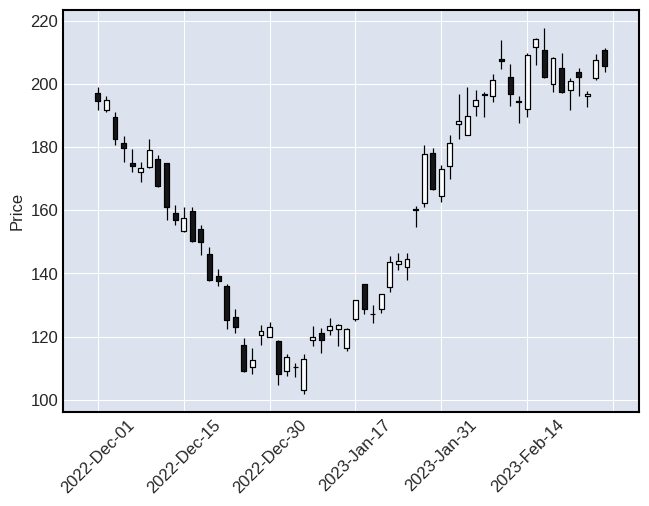

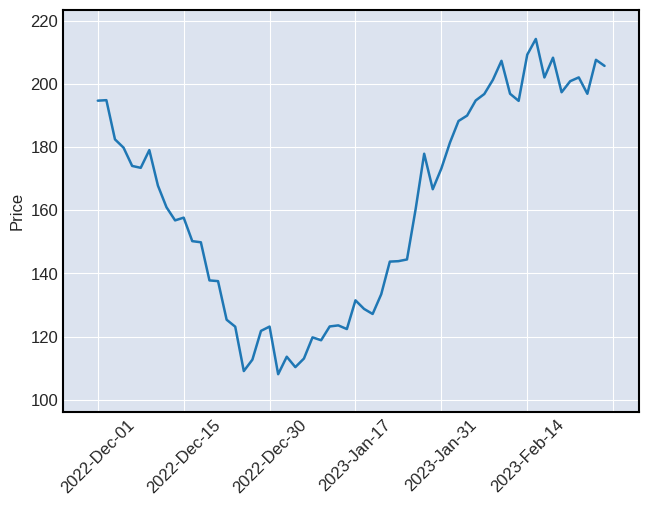

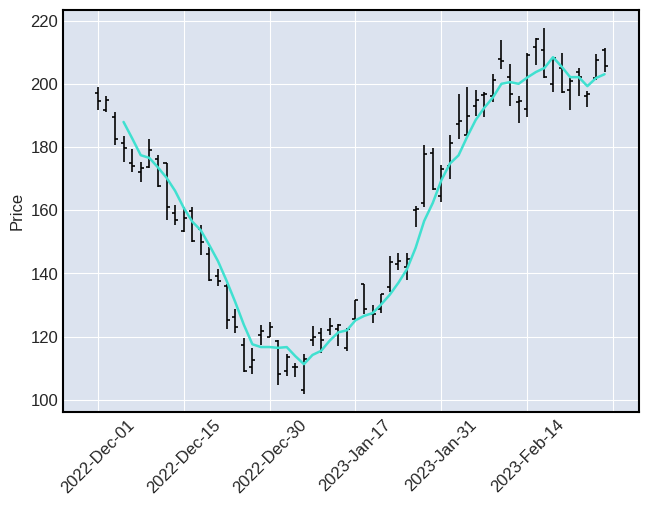

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2022-12-01,197.080002,198.919998,191.800003,194.699997,194.699997,80046200,NaN
1,2022-12-02,191.779999,196.250000,191.110001,194.860001,194.860001,73645900,0.000822
2,2022-12-05,189.440002,191.270004,180.550003,182.449997,182.449997,93122700,-0.063687
3,2022-12-06,181.220001,183.649994,175.330002,179.820007,179.820007,92150800,-0.014415
4,2022-12-07,175.029999,179.380005,172.220001,174.039993,174.039993,84213300,-0.032143
5,2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500,-0.003447
6,2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104872300,0.032345
7,2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500,-0.062720
8,2022-12-13,174.869995,175.050003,156.910004,160.949997,160.949997,175862700,-0.040937
9,2022-12-14,159.250000,161.619995,155.309998,156.800003,156.800003,140682300,-0.025784


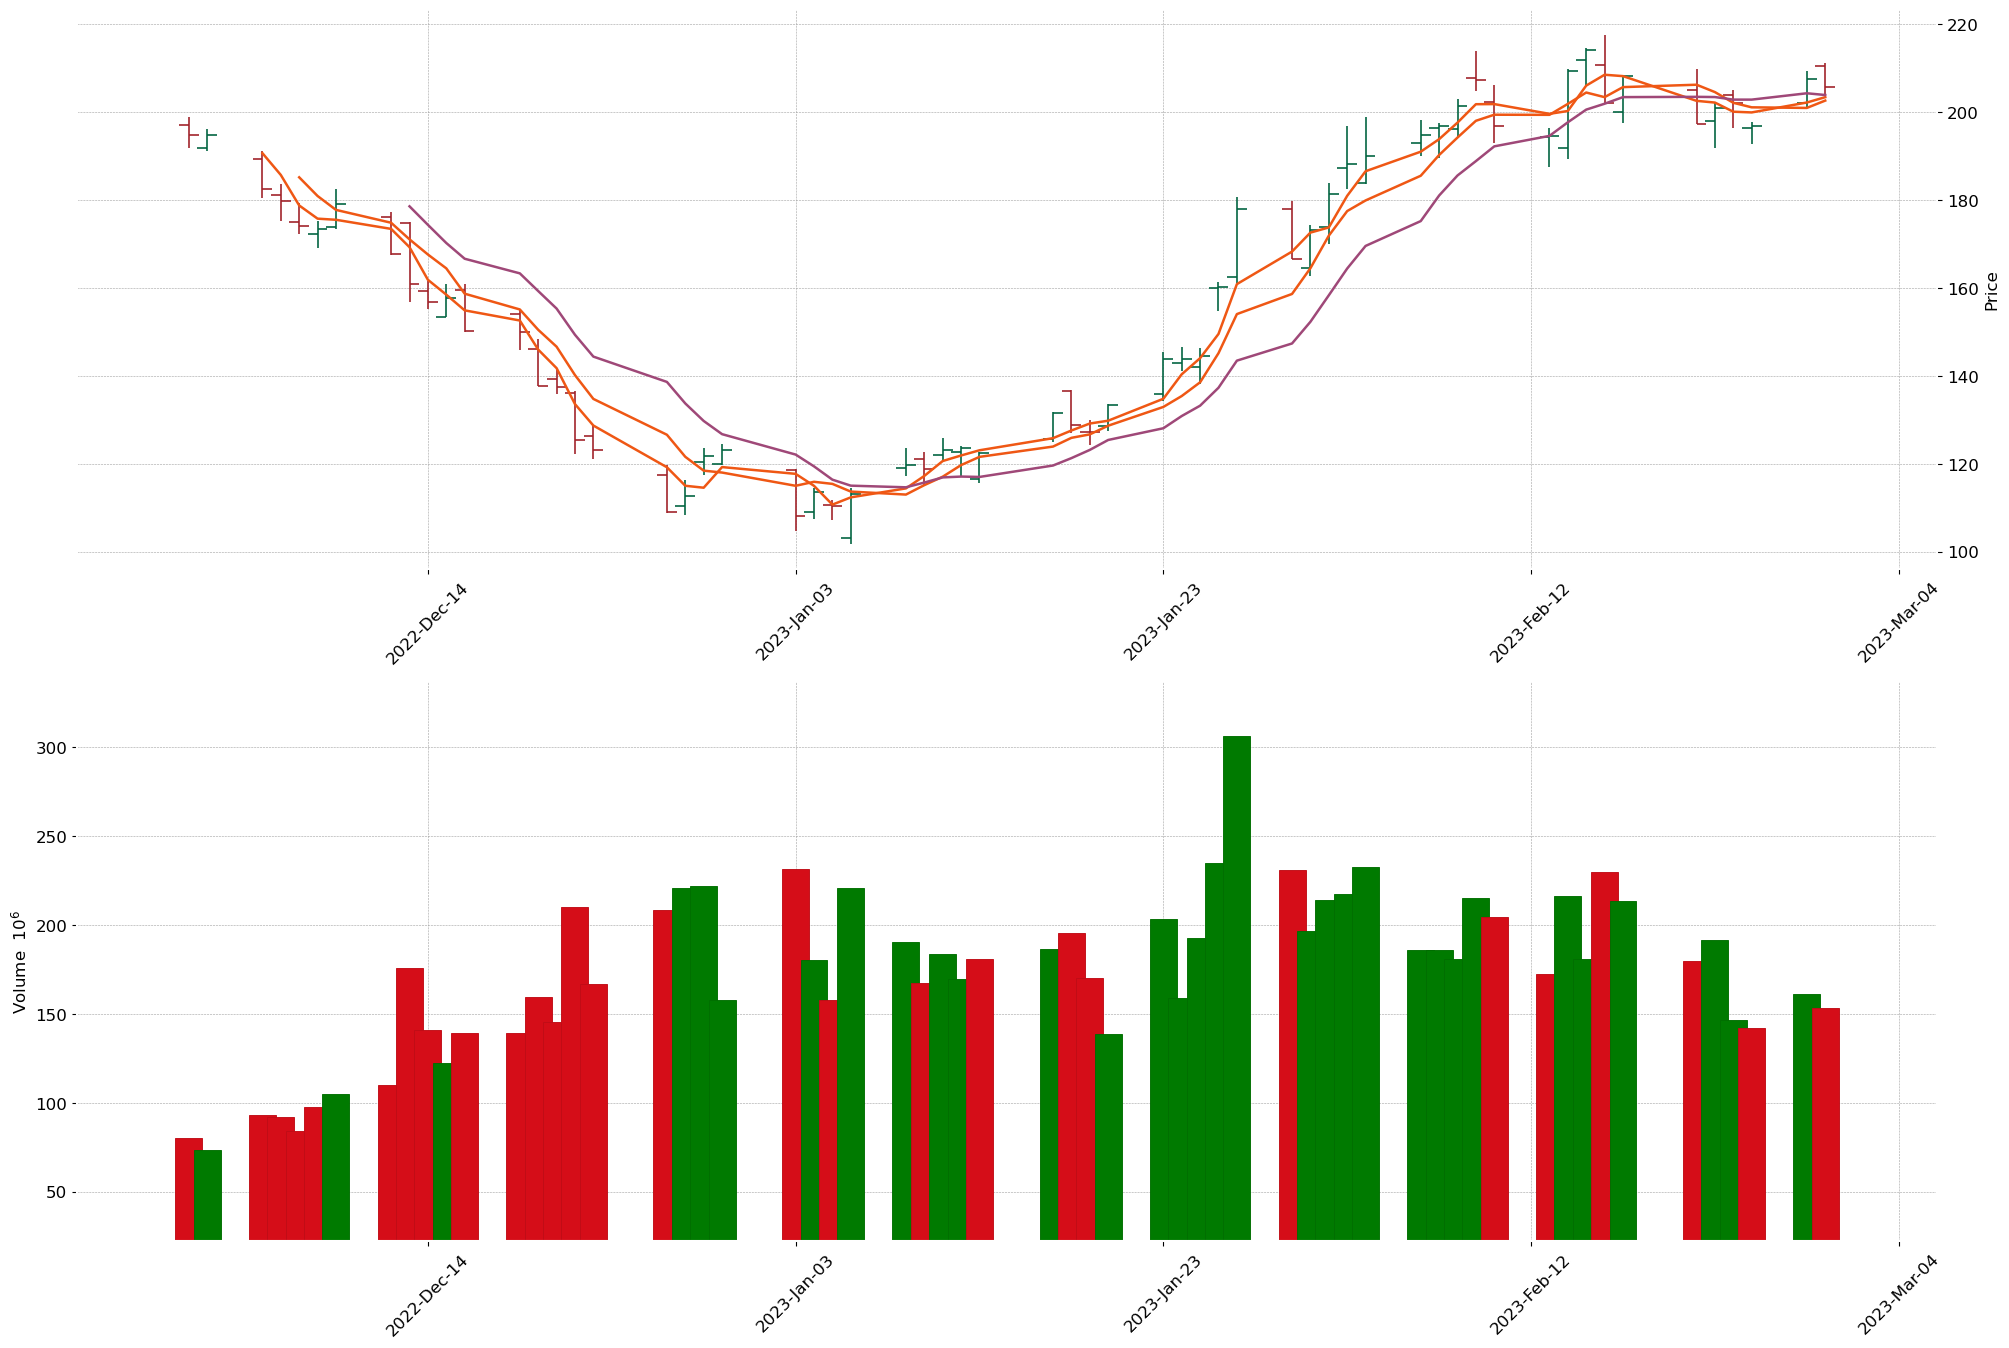

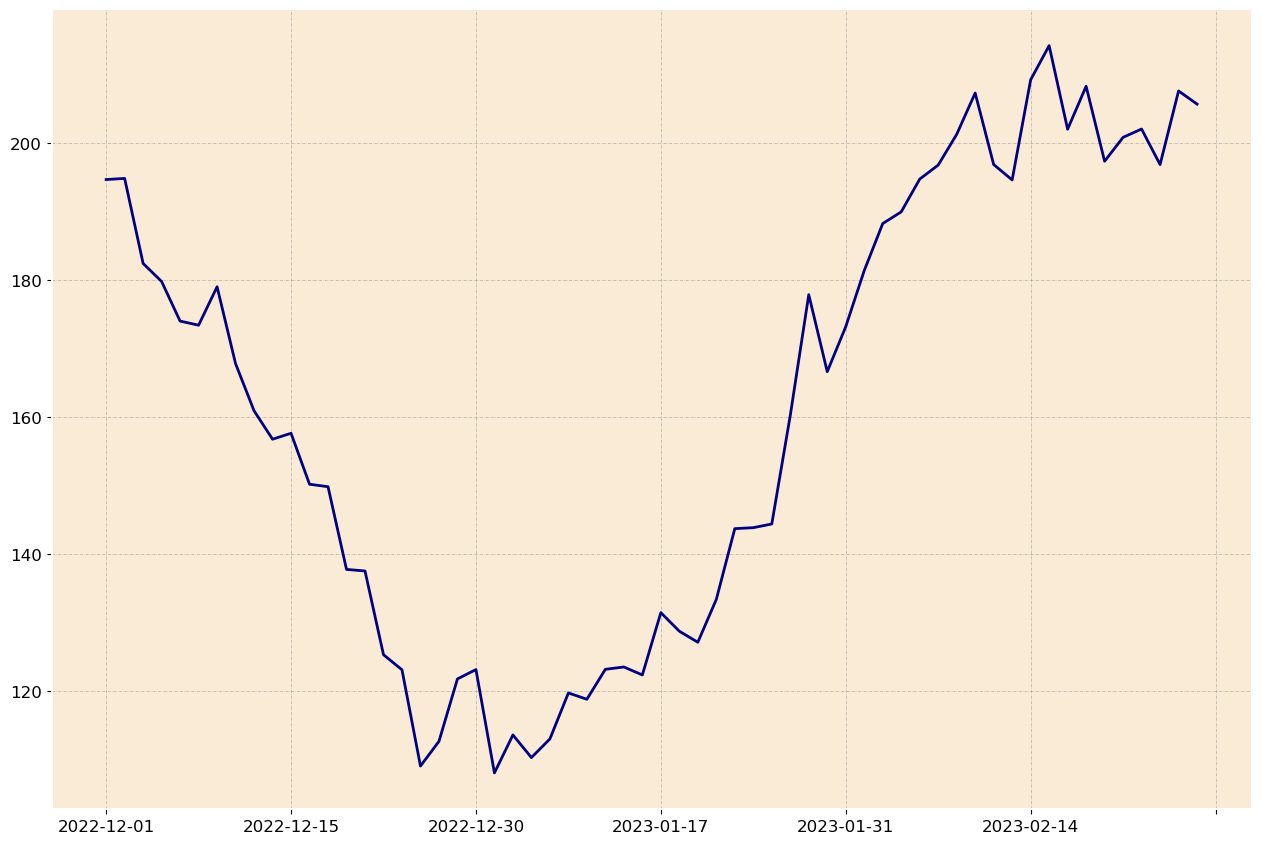

In [27]:
save_to_csv_from_yahoo('TSLA', 2022, 12, 1, 2023, 3, 1)

TSLA = get_df_from_csv('TSLA')
add_daily_return_to_df(TSLA, 'TSLA')
total_return = get_return_defined_time(TSLA, 2022, 12, 1, 2023, 3, 1)
print("Total return: ", total_return)

mplfinance_plot('TSLA', 'ohlc', 2022, 12, 1, 2023, 3, 1)
price_plot('TSLA', 2022, 12, 1, 2023, 3, 1)

tickers = ['FB', 'AAPL', 'NFLX', 'GOOG']
download_multiple_stockes(2022, 12, 1, 2023, 3, 1, *tickers)

merge_df_by_column_name('Adj Close', 2022, 12, 1, 2023, 3, 1, *tickers)

TSLA